In [1]:
from codecarbon import EmissionsTracker

# Set up the emissions tracker
tracker = EmissionsTracker()

[codecarbon INFO @ 20:45:00] [setup] RAM Tracking...
[codecarbon INFO @ 20:45:00] [setup] GPU Tracking...
[codecarbon INFO @ 20:45:00] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:45:00] [setup] CPU Tracking...
[codecarbon WARNING @ 20:45:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:45:01] We saw that you have a 12th Gen Intel(R) Core(TM) i7-12700H but we don't know it. Please contact us.
[codecarbon INFO @ 20:45:01] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 20:45:01] >>> Tracker's metadata:
[codecarbon INFO @ 20:45:01]   Platform system: Windows-10-10.0.22000-SP0
[codecarbon INFO @ 20:45:01]   Python version: 3.8.5
[codecarbon INFO @ 20:45:01]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 20:45:01]   Available RAM : 15.692 GB
[codecarbon INFO @ 20:45:01]   CPU count: 20
[codecarbon INFO @ 20:45:01]   CPU model: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 20:45:01] 

In [2]:
# Start tracking
tracker.start()

In [3]:
import pandas as pd

# Load the data from the provided CSV file
file_path = '../data/Water Level - Santa Barbara - v2.csv'
santa_barbara_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
santa_barbara_data.head(), santa_barbara_data.columns


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.623           3.14
 1  1/1/2023       1:00           2.964           3.45
 2  1/1/2023       2:00           3.021           3.74
 3  1/1/2023       3:00           2.822           3.44
 4  1/1/2023       4:00           2.450           3.08,
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)'], dtype='object'))

In [4]:
# Convert 'Date' and 'Time (GMT)' to datetime and set as index
santa_barbara_data['Datetime'] = pd.to_datetime(santa_barbara_data['Date'] + ' ' + santa_barbara_data['Time (GMT)'])
santa_barbara_data.set_index('Datetime', inplace=True)

# Create lag features for 24 hours
for lag in range(1, 25):
    santa_barbara_data[f'lag_{lag}_hour'] = santa_barbara_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values which will be the first 24 hours
santa_barbara_data_clean = santa_barbara_data.dropna()

# Preview the updated dataframe
santa_barbara_data_clean.head()


,Date,Time (GMT),Predicted (ft),Verified (ft),lag_1_hour,lag_2_hour,lag_3_hour,lag_4_hour,lag_5_hour,lag_6_hour,...,lag_15_hour,lag_16_hour,lag_17_hour,lag_18_hour,lag_19_hour,lag_20_hour,lag_21_hour,lag_22_hour,lag_23_hour,lag_24_hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,1/2/2023,0:00,1.729,2.08,1.51,0.77,0.57,1.01,1.43,2.24,...,3.34,2.78,2.85,2.85,2.77,3.08,3.44,3.74,3.45,3.14
2023-01-02 01:00:00,1/2/2023,1:00,2.414,2.76,2.08,1.51,0.77,0.57,1.01,1.43,...,4.20,3.34,2.78,2.85,2.85,2.77,3.08,3.44,3.74,3.45
2023-01-02 02:00:00,1/2/2023,2:00,2.891,3.17,2.76,2.08,1.51,0.77,0.57,1.01,...,4.73,4.20,3.34,2.78,2.85,2.85,2.77,3.08,3.44,3.74
2023-01-02 03:00:00,1/2/2023,3:00,3.078,3.26,3.17,2.76,2.08,1.51,0.77,0.57,...,5.46,4.73,4.20,3.34,2.78,2.85,2.85,2.77,3.08,3.44
2023-01-02 04:00:00,1/2/2023,4:00,2.994,3.34,3.26,3.17,2.76,2.08,1.51,0.77,...,5.99,5.46,4.73,4.20,3.34,2.78,2.85,2.85,2.77,3.08


In [5]:
# Load the future data provided by the user
future_data_path = '../data/future data - Santa Barbara.csv'
future_data = pd.read_csv(future_data_path)

# Convert 'Date' and 'Time (GMT)' to datetime and set as index
future_data['Datetime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('Datetime', inplace=True)

# Create lag features for the future data
for lag in range(1, 25):
    future_data[f'lag_{lag}_hour'] = future_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values
future_data_clean = future_data.dropna()

# Display the prepared future data
future_data_clean.head(), future_data_clean.columns


(Empty DataFrame
 Columns: [Date, Time (GMT), Predicted (ft), Verified (ft), lag_1_hour, lag_2_hour, lag_3_hour, lag_4_hour, lag_5_hour, lag_6_hour, lag_7_hour, lag_8_hour, lag_9_hour, lag_10_hour, lag_11_hour, lag_12_hour, lag_13_hour, lag_14_hour, lag_15_hour, lag_16_hour, lag_17_hour, lag_18_hour, lag_19_hour, lag_20_hour, lag_21_hour, lag_22_hour, lag_23_hour, lag_24_hour]
 Index: []
 
 [0 rows x 28 columns],
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)', 'lag_1_hour',
        'lag_2_hour', 'lag_3_hour', 'lag_4_hour', 'lag_5_hour', 'lag_6_hour',
        'lag_7_hour', 'lag_8_hour', 'lag_9_hour', 'lag_10_hour', 'lag_11_hour',
        'lag_12_hour', 'lag_13_hour', 'lag_14_hour', 'lag_15_hour',
        'lag_16_hour', 'lag_17_hour', 'lag_18_hour', 'lag_19_hour',
        'lag_20_hour', 'lag_21_hour', 'lag_22_hour', 'lag_23_hour',
        'lag_24_hour'],
       dtype='object'))

In [6]:
# Display the initial rows of the future data as uploaded
initial_future_data_display = future_data.head(10)
last_future_data_display = future_data.tail(10)

initial_future_data_display, last_future_data_display


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.581           2.83   
 2024-04-01 01:00:00  4/1/2024       1:00           2.674           3.01   
 2024-04-01 02:00:00  4/1/2024       2:00           2.780           3.05   
 2024-04-01 03:00:00  4/1/2024       3:00           2.943           3.29   
 2024-04-01 04:00:00  4/1/2024       4:00           3.196           3.41   
 2024-04-01 05:00:00  4/1/2024       5:00           3.532           3.80   
 2024-04-01 06:00:00  4/1/2024       6:00           3.897           4.10   
 2024-04-01 07:00:00  4/1/2024       7:00           4.247           4.60   
 2024-04-01 08:00:00  4/1/2024       8:00           4.526           4.88   
 2024-04-01 09:00:00  4/1/2024       9:00           4.641           4.80   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime     

In [7]:
# Extract the last 24 hours from the historical data to prepend to the future data for complete lag features
last_24_hours = santa_barbara_data_clean.tail(24)

# Concatenate the last 24 hours of historical data with the future data
combined_future_data = pd.concat([last_24_hours, future_data])

# Recreate the lag features to ensure they are correctly computed
for lag in range(1, 25):
    combined_future_data[f'lag_{lag}_hour'] = combined_future_data['Verified (ft)'].shift(lag)

# Now select only the rows for April 1, 2024, that should have complete lag features
final_future_data = combined_future_data[combined_future_data.index >= '2024-04-01'].dropna()

# Display the final prepared data for April 1, 2024
final_future_data.head(), final_future_data.columns


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.581           2.83   
 2024-04-01 01:00:00  4/1/2024       1:00           2.674           3.01   
 2024-04-01 02:00:00  4/1/2024       2:00           2.780           3.05   
 2024-04-01 03:00:00  4/1/2024       3:00           2.943           3.29   
 2024-04-01 04:00:00  4/1/2024       4:00           3.196           3.41   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime                                                              
 2024-04-01 00:00:00        2.85        2.77        2.48        2.01   
 2024-04-01 01:00:00        2.83        2.85        2.77        2.48   
 2024-04-01 02:00:00        3.01        2.83        2.85        2.77   
 2024-04-01 03:00:00        3.05        3.01        2.83        2.85   
 2024-04-01 04:00:00        3.29  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Since we want to predict for April 1, 2024, we will use data until March 31, 2024, for training
train_data = santa_barbara_data_clean[santa_barbara_data_clean.index < '2024-04-01']

# Features and target variable
X_train = train_data[[f'lag_{i}_hour' for i in range(1, 25)]]
y_train = train_data['Verified (ft)']

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


[codecarbon INFO @ 20:45:19] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 20:45:19] Energy consumed for all GPUs : 0.000076 kWh. Total GPU Power : 18.292247739897668 W
[codecarbon INFO @ 20:45:19] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:19] 0.000278 kWh of electricity used since the beginning.


RandomForestRegressor(random_state=42)

In [9]:
# Train Gradient Boosting Machine Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [10]:
# Selecting features for the prediction
X_future = final_future_data[[f'lag_{i}_hour' for i in range(1, 25)]]

# Making predictions using both models
predictions_rf = rf_model.predict(X_future)
predictions_gbm = gbm_model.predict(X_future)

# Combining predictions with the actual times for display
predictions_results = final_future_data[['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)']].copy()
predictions_results['RF Predictions (ft)'] = predictions_rf
predictions_results['GBM Predictions (ft)'] = predictions_gbm

predictions_results


,Date,Time (GMT),Predicted (ft),Verified (ft),RF Predictions (ft),GBM Predictions (ft)
Datetime,,,,,,
2024-04-01 00:00:00,4/1/2024,0:00,2.581,2.83,3.0339,3.079889
2024-04-01 01:00:00,4/1/2024,1:00,2.674,3.01,2.9624,3.094063
2024-04-01 02:00:00,4/1/2024,2:00,2.780,3.05,3.0930,3.155036
2024-04-01 03:00:00,4/1/2024,3:00,2.943,3.29,3.2497,3.304371
2024-04-01 04:00:00,4/1/2024,4:00,3.196,3.41,3.5410,3.605031
2024-04-01 05:00:00,4/1/2024,5:00,3.532,3.80,3.9258,3.936667
2024-04-01 06:00:00,4/1/2024,6:00,3.897,4.10,4.3212,4.303350
2024-04-01 07:00:00,4/1/2024,7:00,4.247,4.60,4.5253,4.596928
2024-04-01 08:00:00,4/1/2024,8:00,4.526,4.88,5.0050,5.113629


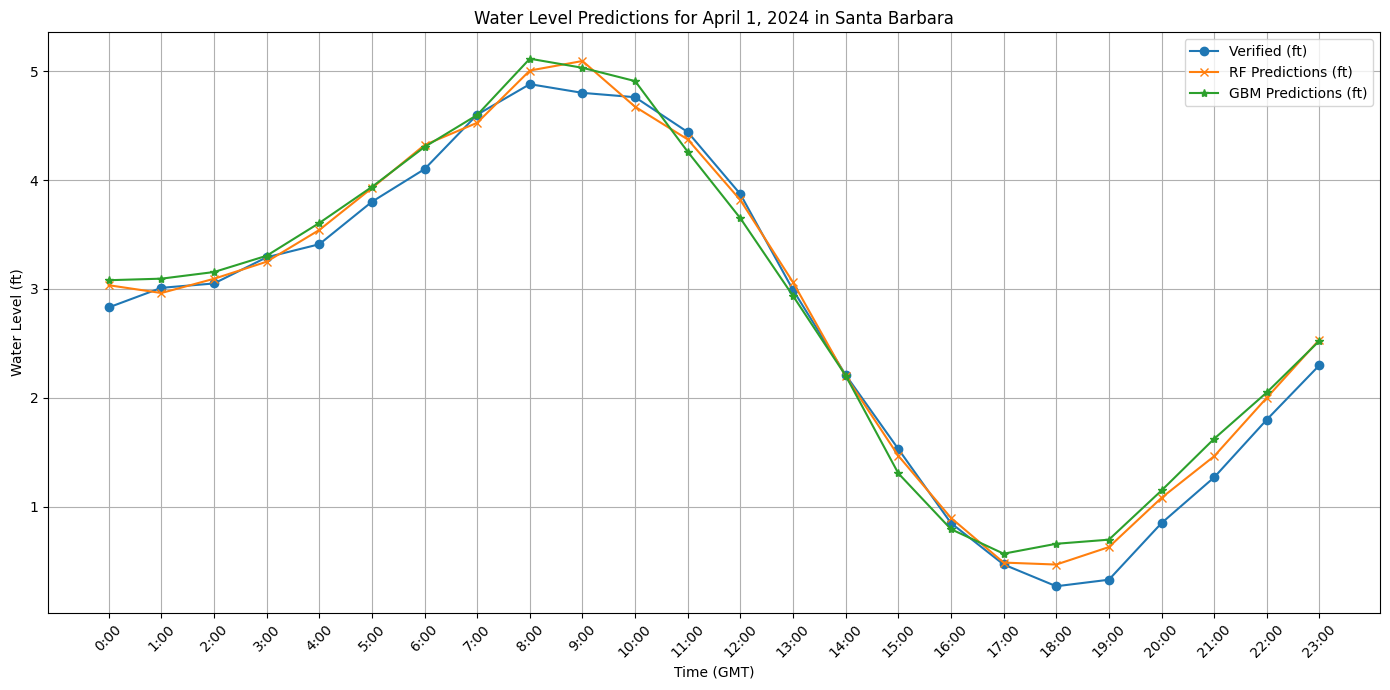

In [11]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values
plt.figure(figsize=(14, 7))
plt.plot(predictions_results['Time (GMT)'], predictions_results['Verified (ft)'], label='Verified (ft)', marker='o')
plt.plot(predictions_results['Time (GMT)'], predictions_results['RF Predictions (ft)'], label='RF Predictions (ft)', marker='x')
plt.plot(predictions_results['Time (GMT)'], predictions_results['GBM Predictions (ft)'], label='GBM Predictions (ft)', marker='*')

plt.title('Water Level Predictions for April 1, 2024 in Santa Barbara')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (ft)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual verified levels
y_true = predictions_results['Verified (ft)'].values

# RF model predictions
rf_predictions = predictions_results['RF Predictions (ft)'].values

# GBM model predictions
gbm_predictions = predictions_results['GBM Predictions (ft)'].values

# Calculate MSE, MAE, RMSE, R2 for RF
mse_rf = mean_squared_error(y_true, rf_predictions)
mae_rf = mean_absolute_error(y_true, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_true, rf_predictions)

# Calculate MSE, MAE, RMSE, R2 for GBM
mse_gbm = mean_squared_error(y_true, gbm_predictions)
mae_gbm = mean_absolute_error(y_true, gbm_predictions)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_true, gbm_predictions)

(mse_rf, mae_rf, rmse_rf, r2_rf), (mse_gbm, mae_gbm, rmse_gbm, r2_gbm)


((0.024144846666666577,
  0.12853333333333308,
  0.15538612121636403,
  0.9892056694438807),
 (0.044630334357776504,
  0.18041649913553284,
  0.21125892728539664,
  0.9800473124332133))

**Random Forest (RF) Model:**
- Mean Squared Error (MSE): 0.0241
- Mean Absolute Error (MAE): 0.129
- Root Mean Squared Error (RMSE): 0.155
- R-squared (R²): 0.989

**Gradient Boosting Machine (GBM) Model:**
- Mean Squared Error (MSE): 0.0446
- Mean Absolute Error (MAE): 0.180
- Root Mean Squared Error (RMSE): 0.211
- R-squared (R²): 0.980

In [13]:
# Stop tracking and get emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for the computation: {emissions} kg")

[codecarbon INFO @ 20:45:29] Energy consumed for RAM : 0.000040 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 20:45:29] Energy consumed for all GPUs : 0.000125 kWh. Total GPU Power : 18.11654643921854 W
[codecarbon INFO @ 20:45:29] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:29] 0.000457 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:45:29] graceful shutdown. Exceptions:
[codecarbon WARNING @ 20:45:29] <class 'Exception'>
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\codecarbon\core\util.py", line 23, in suppress
    yield
  File "D:\Anaconda3\lib\contextlib.py", line 75, in inner
    return func(*args, **kwds)
  File "D:\Anaconda3\lib\site-packages\codecarbon\emissions_tracker.py", line 546, in stop
    self._persist_data(emissions_data, experiment_name=self._experiment_name)
  File "D:\Anaconda3\lib\site-packages\codecarbon\emissions_tracker.py", line 557, in _persist_data


Estimated CO2 emissions for the computation: None kg
